# Where do Kagglers come from ?

We are approximatelly 130 000 Kaggle users, and 7000 experts/masters/grand masters.
How many Kagglers in my country, what are the most Kaggler-populated countries ....
You asked perhaps yourself those questions. And I will try to bring some answer. The problem is that there is no map or list of Kaggle community. So let's investigate.

# 1. Get the List

The place where you can get a list of Kagglers is here : https://www.kaggle.com/rankings
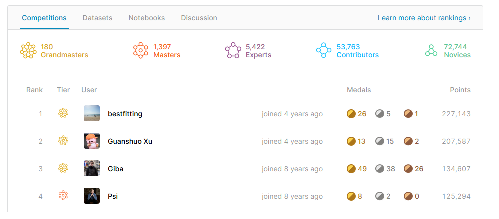
But wait ... this is a web page, I'm not getting to pay a dozen of mecanichal turcs to transcribe the web page data to a spreadsheet ? 
Second probleme, you get only the top 20 Kagglers, to get the next ones, you have to manually scroll down the web page.
I used a little python script using "requests" and some libraries, that I will not develop here, it's not the goal of this notebook. But I will give you some details.
First, if you open your developpers tool in your browser (I use Firefox, to open developpers tools : CTRL+SHIFT+I), you can monitor what is going on and how you browser retrieves the data. To do so, select "Network tool" and filter "XHR" requests. 

When downloading the rankings page (and scolling donw), you can see that the browser makes some url requests like this one https://www.kaggle.com/rankings.json?group=competitions&page=2&pageSize=20 and the result is .... json !!

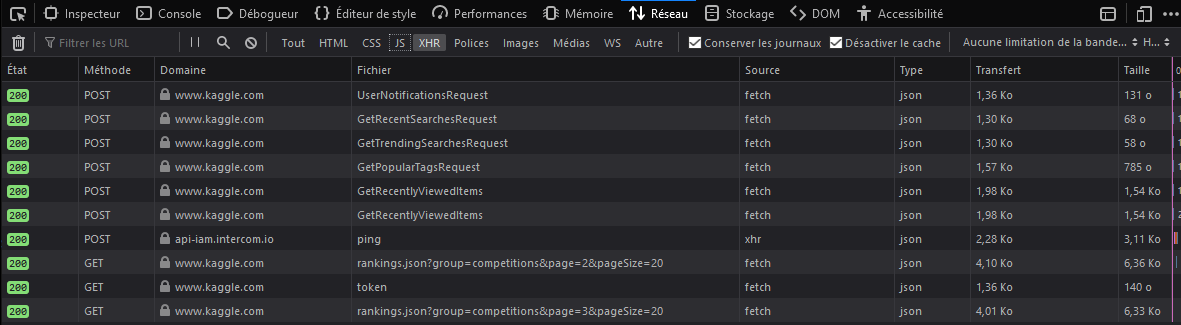

JSON is very easy to deal with, especially in PYTHON. So, you just have to call the url below with different values of "page" parameter.
You get a list of approx 6000 Kagglers (only masters, grandmasters and experts ... ). Ok we have the list but ... there is no location ?

# 2. Get the details

In the list you get, you have the url of the Kaggler's page, like my page : https://www.kaggle.com/DJousto , you can se in this page some details like location, job, personal web ...
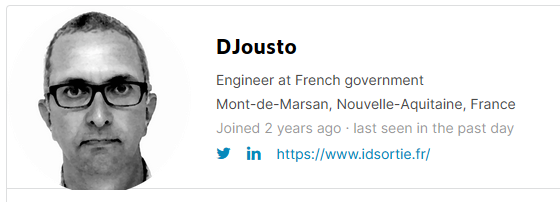
Once again, this is easy to scrap with Python / requests. You have a list of URL, with each URL get the page, and then analyse the page (I did it with regex) to get the data. A small problem is that Kaggle limits the number of requests so after some requests you have to wait some time. I put my scraper script on my raspberry and let it work over the night.

So we have a list of Kagglers, let's play with it

# 3. Where do kagglers come from

OK, let's retrive data, I stored it in a csv file in '../input/liste.csv'

**This list is not complete now, my little scraper bot is still working**

In [ ]:
# get necessary libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

plt.figure(figsize=(16,6))
%matplotlib inline

data = pd.read_csv('../input/kagglers/liste.csv',sep=';')
data.head()

In [ ]:
data.pays.value_counts()[:10]

In [ ]:
nodata = int(data.pays.isna().sum()/len(data)*100)
print(str(nodata),"% of Kagglers did'nt give their country")

In [ ]:
plt.figure(figsize=(16,6))
data.pays.value_counts()[:10].plot.bar()

Wow, we immediately notice that some countries (five I would say) are really in top of others. But they are also big countries, with high population, let us see if the kagglers rate among population changes the ranking.

# 4. Kagglers rate


I first get demographic data and simplify it

In [ ]:
population = pd.read_csv('../input/population-by-country-2020/population_by_country_2020.csv',sep=',')
population = population[['Country (or dependency)','Population (2020)']]
population = population.rename(columns={"Country (or dependency)": "pays", "Population (2020)": "population"})
population = population.set_index('pays')
population = population.iloc[:,0]
population.head()

In [ ]:
top_countries = data.pays.value_counts()
top_countries = top_countries.divide(population)*1000000
df = top_countries.sort_values(ascending=False)[:30]

df.plot(kind='barh',    # Plot a bar chart
        figsize=(16,16))


You can see that it's not at all the same ranking .... I think that very small countries (below 1M) are not significant, let's get rid of small countries

In [ ]:
mostPopulated = population[population>1000000]
top_countries = data.pays.value_counts()
top_countries = top_countries.divide(mostPopulated)*1000000
df = top_countries.sort_values(ascending=False)[:30]

df.plot(kind='barh',    # Plot a bar chart
        figsize=(16,16))

I was surprised to see some countries on the top of this list : Belarus, Israel ... did you imagine that those countries had so many datascientists ?

   # 6. Universities
   
   Is there a relationship between number of data scientists and universities in the country ? to verify that I get the shangai ranking of top 1000 universities.

In [ ]:
universities = pd.read_html('http://www.shanghairanking.com/ARWU-Statistics-2019.html', header=0, index_col=0)
nbUniversities = universities[1]['501-1000'].replace('—',0).astype(int)
nbKagglers = data.pays.value_counts()
KagglersVSuniversities = pd.DataFrame(dict(s1 = nbKagglers, s2 = nbUniversities)).reset_index().dropna()
plt.figure(figsize=(16,10))
# let us see if there seem to be a correlation between number of top 1000 universities and number of KAggles
sns.scatterplot(x="s1", y="s2", data=KagglersVSuniversities)
plt.title('Kagglers VS universities')
# Set x-axis label
plt.xlabel('nb Kagglers')
# Set y-axis label
plt.ylabel('nb Universities')
plt.ylim(0, 40)
plt.xlim(0, 100)

Graphically we can say that there seem to be a relation, to be more precise we can compute the pearson correlation parameter :

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(KagglersVSuniversities.s1,KagglersVSuniversities.s2 )
print('Pearsons correlation: %.3f' % corr)

this is a rather high value, there is a high relation between number of universities and number of Kagglers

More to come ....